In [2]:
import pandas as pd 
  
# Get the data 
column_names = ['user_id', 'item_id', 'rating', 'timestamp'] 

  
df = pd.read_csv('file.tsv', sep='\t', names=column_names) 
  
# Check the head of the data 
df.head() 

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
movie_titles = pd.read_csv('Movie_Id_Titles.csv') 
movie_titles.head() 

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:

data = pd.merge(df, movie_titles, on='item_id') 
data.head() 


,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [5]:

# Calculate mean rating of all movies 
data.groupby('title')['rating'].mean().sort_values(ascending=False)


title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [6]:

# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 
  
ratings


,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
2 Days in the Valley (1996),3.225806,93
"20,000 Leagues Under the Sea (1954)",3.500000,72
2001: A Space Odyssey (1968),3.969112,259
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5


In [7]:

import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 


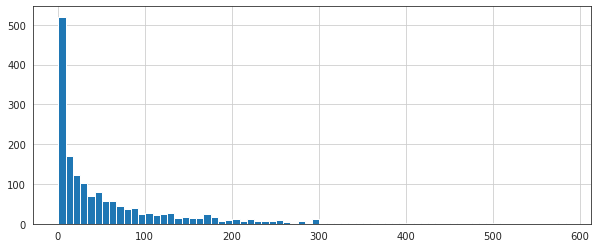

In [8]:

# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 


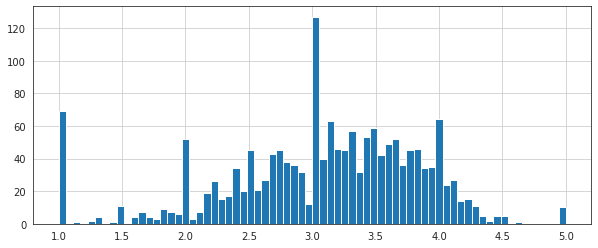

In [9]:

# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['rating'].hist(bins = 70) 


In [10]:

# Sorting values according to  
# the 'num of rating column' 
moviemat = data.pivot_table(index ='user_id', 
              columns ='title', values ='rating') 
  
moviemat.head() 
  
ratings.sort_values('num of ratings', ascending = False)


,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [11]:

# analysing correlation with similar movies 
starwars_user_ratings = moviemat['Star Wars (1977)'] 
liarliar_user_ratings = moviemat['Liar Liar (1997)'] 
  
starwars_user_ratings


user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
5      4.0
6      4.0
7      5.0
8      5.0
9      5.0
10     5.0
11     NaN
12     4.0
13     5.0
14     5.0
15     5.0
16     NaN
17     NaN
18     4.0
19     NaN
20     3.0
21     3.0
22     5.0
23     4.0
24     NaN
25     5.0
26     4.0
27     3.0
28     4.0
29     NaN
      ... 
914    NaN
915    NaN
916    5.0
917    3.0
918    NaN
919    3.0
920    NaN
921    4.0
922    5.0
923    5.0
924    5.0
925    NaN
926    NaN
927    NaN
928    NaN
929    4.0
930    2.0
931    3.0
932    NaN
933    4.0
934    5.0
935    NaN
936    4.0
937    5.0
938    5.0
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [12]:

# analysing correlation with similar movies 
similar_to_starwars = moviemat.corrwith(starwars_user_ratings) 
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 
  
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 
  
corr_starwars

/home/vimarsha/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/vimarsha/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [13]:

# Similar movies like starwars 
corr_starwars.sort_values('Correlation', ascending = False).head(10) 
corr_starwars = corr_starwars.join(ratings['num of ratings']) 
  
corr_starwars.head() 
  
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False)


,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [14]:

# Similar movies as of liarliar 
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation']) 
corr_liarliar.dropna(inplace = True) 
  
corr_liarliar = corr_liarliar.join(ratings['num of ratings']) 
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False)


,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
